# Application of SPACE on simulation dataset

The following tutorial demonstrates how to use SPACE for tissue module discovery in a simulation dataset

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq
import space as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib import colors
from termcolor import colored

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI

In [3]:
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=120,facecolor='w',frameon=True,figsize=(4,4)) 
%config InlineBackend.figure_format='retina'
%matplotlib inline

2022-12-22 09:42:31.663181: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.21.6 scipy==1.7.1 pandas==1.5.0 scikit-learn==0.24.1 statsmodels==0.13.0 python-igraph==0.9.10 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [5]:
sp.__version__

'0.1.0'

## Simulation dataset

**Goal**: To investigate how the reconstruction of a neighboring graph employed by SPACE improves its capacity to accurately discover tissue modules compared to gene expression-based methods.

To construct the simulation dataset where tissue modules comprised distinct cell types but with overall similar gene expression profiles, we selected all oligodendrocytes and OPCs from slice 153 of the [MERFISH mouse PMC dataset](https://doi.org/10.35077/g.21) and distributed them evenly to form tissue module #1. We then used all oligodendrocytes and microglia from the same slice to form tissue module #2, placing this module adjacent to tissue module #1. 

In [6]:
adata_all=sc.read('MERFISH_sim.h5ad')
adata_all

AnnData object with n_obs × n_vars = 1695 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'BICCN_cluster_label', 'BICCN_subclass_label', 'BICCN_class_label', 'BICCN_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'ethnicity', 'development_stage', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mouse', 'slice', 'dataset', 'sample', 'subclass', 'subclass_preprocessed', 'leiden_SPACE', 'louvain_SPACE', 'leiden_c8', 'leiden_c5', 'leiden_c0', 'leiden_c0-10-15', 'leiden_c7', 'leiden_c4', 'leiden_c1', 'leiden_c15', 'leiden_c27', 'leiden_c15-27', 'leiden_c23', 'leiden_inh', 'leiden_c0-2', 'celltype_SPACE', 'Cell_Communities_test', 'Cell_

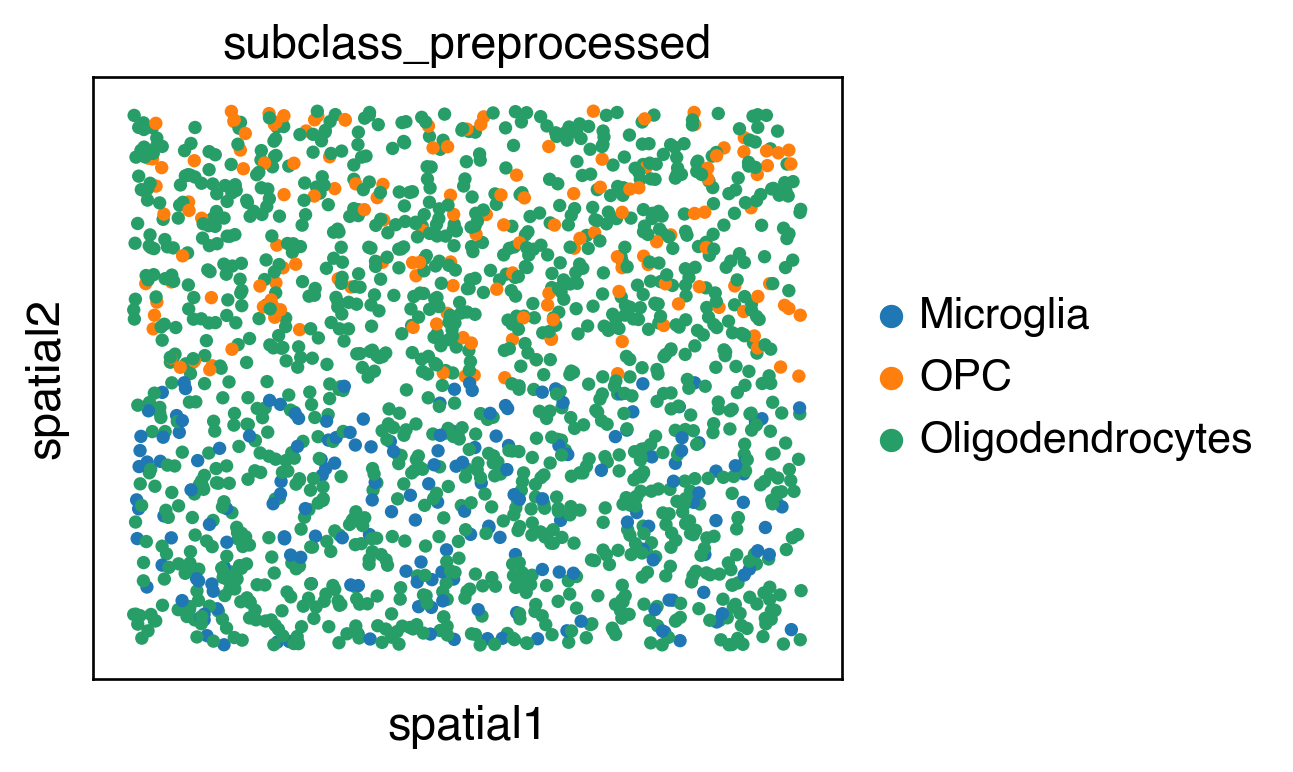

In [7]:
sc.pl.spatial(adata_all,color=['subclass_preprocessed'],spot_size=2,basis='spatial')

In [8]:
adata=sp.SPACE(adata_all,outdir='sim',GPU=0,patience=50,alpha=0.5,lr=0.002,epoch=5000)

Construct Graph
Average links: 22.28
Load SPACE Graph model
SPACE_Graph(
  (encoder): GAT_Encoder(
    (hidden_layer1): GATv2Conv(254, 128, heads=6)
    (hidden_layer2): GATv2Conv(768, 128, heads=6)
    (conv_z): GATv2Conv(768, 10, heads=6)
  )
  (decoder): InnerProductDecoder()
  (decoder_x): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=128, out_features=254, bias=True)
    (5): ReLU()
  )
)
Train SPACE Graph model


  0%|          | 0/5000 [00:00<?, ?it/s]

====> Epoch: 50, Loss: 21.8514
====> Epoch: 100, Loss: 20.3176
====> Epoch: 150, Loss: 18.8948
====> Epoch: 200, Loss: 17.8316
====> Epoch: 250, Loss: 17.6167
====> Epoch: 300, Loss: 17.4443
====> Epoch: 350, Loss: 17.1298
====> Epoch: 400, Loss: 16.8552
====> Epoch: 450, Loss: 16.6639
====> Epoch: 500, Loss: 16.5026
====> Epoch: 550, Loss: 16.3926
====> Epoch: 600, Loss: 16.2972
====> Epoch: 650, Loss: 16.1896
====> Epoch: 700, Loss: 16.1050
====> Epoch: 750, Loss: 16.0453
====> Epoch: 800, Loss: 15.9776
====> Epoch: 850, Loss: 15.9000
====> Epoch: 900, Loss: 15.8182
====> Epoch: 950, Loss: 15.8027
====> Epoch: 1000, Loss: 15.7559
====> Epoch: 1050, Loss: 15.7144
====> Epoch: 1100, Loss: 15.6765
====> Epoch: 1150, Loss: 15.6243
====> Epoch: 1200, Loss: 15.6119
====> Epoch: 1250, Loss: 15.5444
====> Epoch: 1300, Loss: 15.5684
====> Epoch: 1350, Loss: 15.5276
====> Epoch: 1400, Loss: 15.4986
====> Epoch: 1450, Loss: 15.4979
====> Epoch: 1500, Loss: 15.4769
====> Epoch: 1550, Loss: 15.42

In [9]:
sc.tl.leiden(adata,resolution=0.05,neighbors_key='SPACE')

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


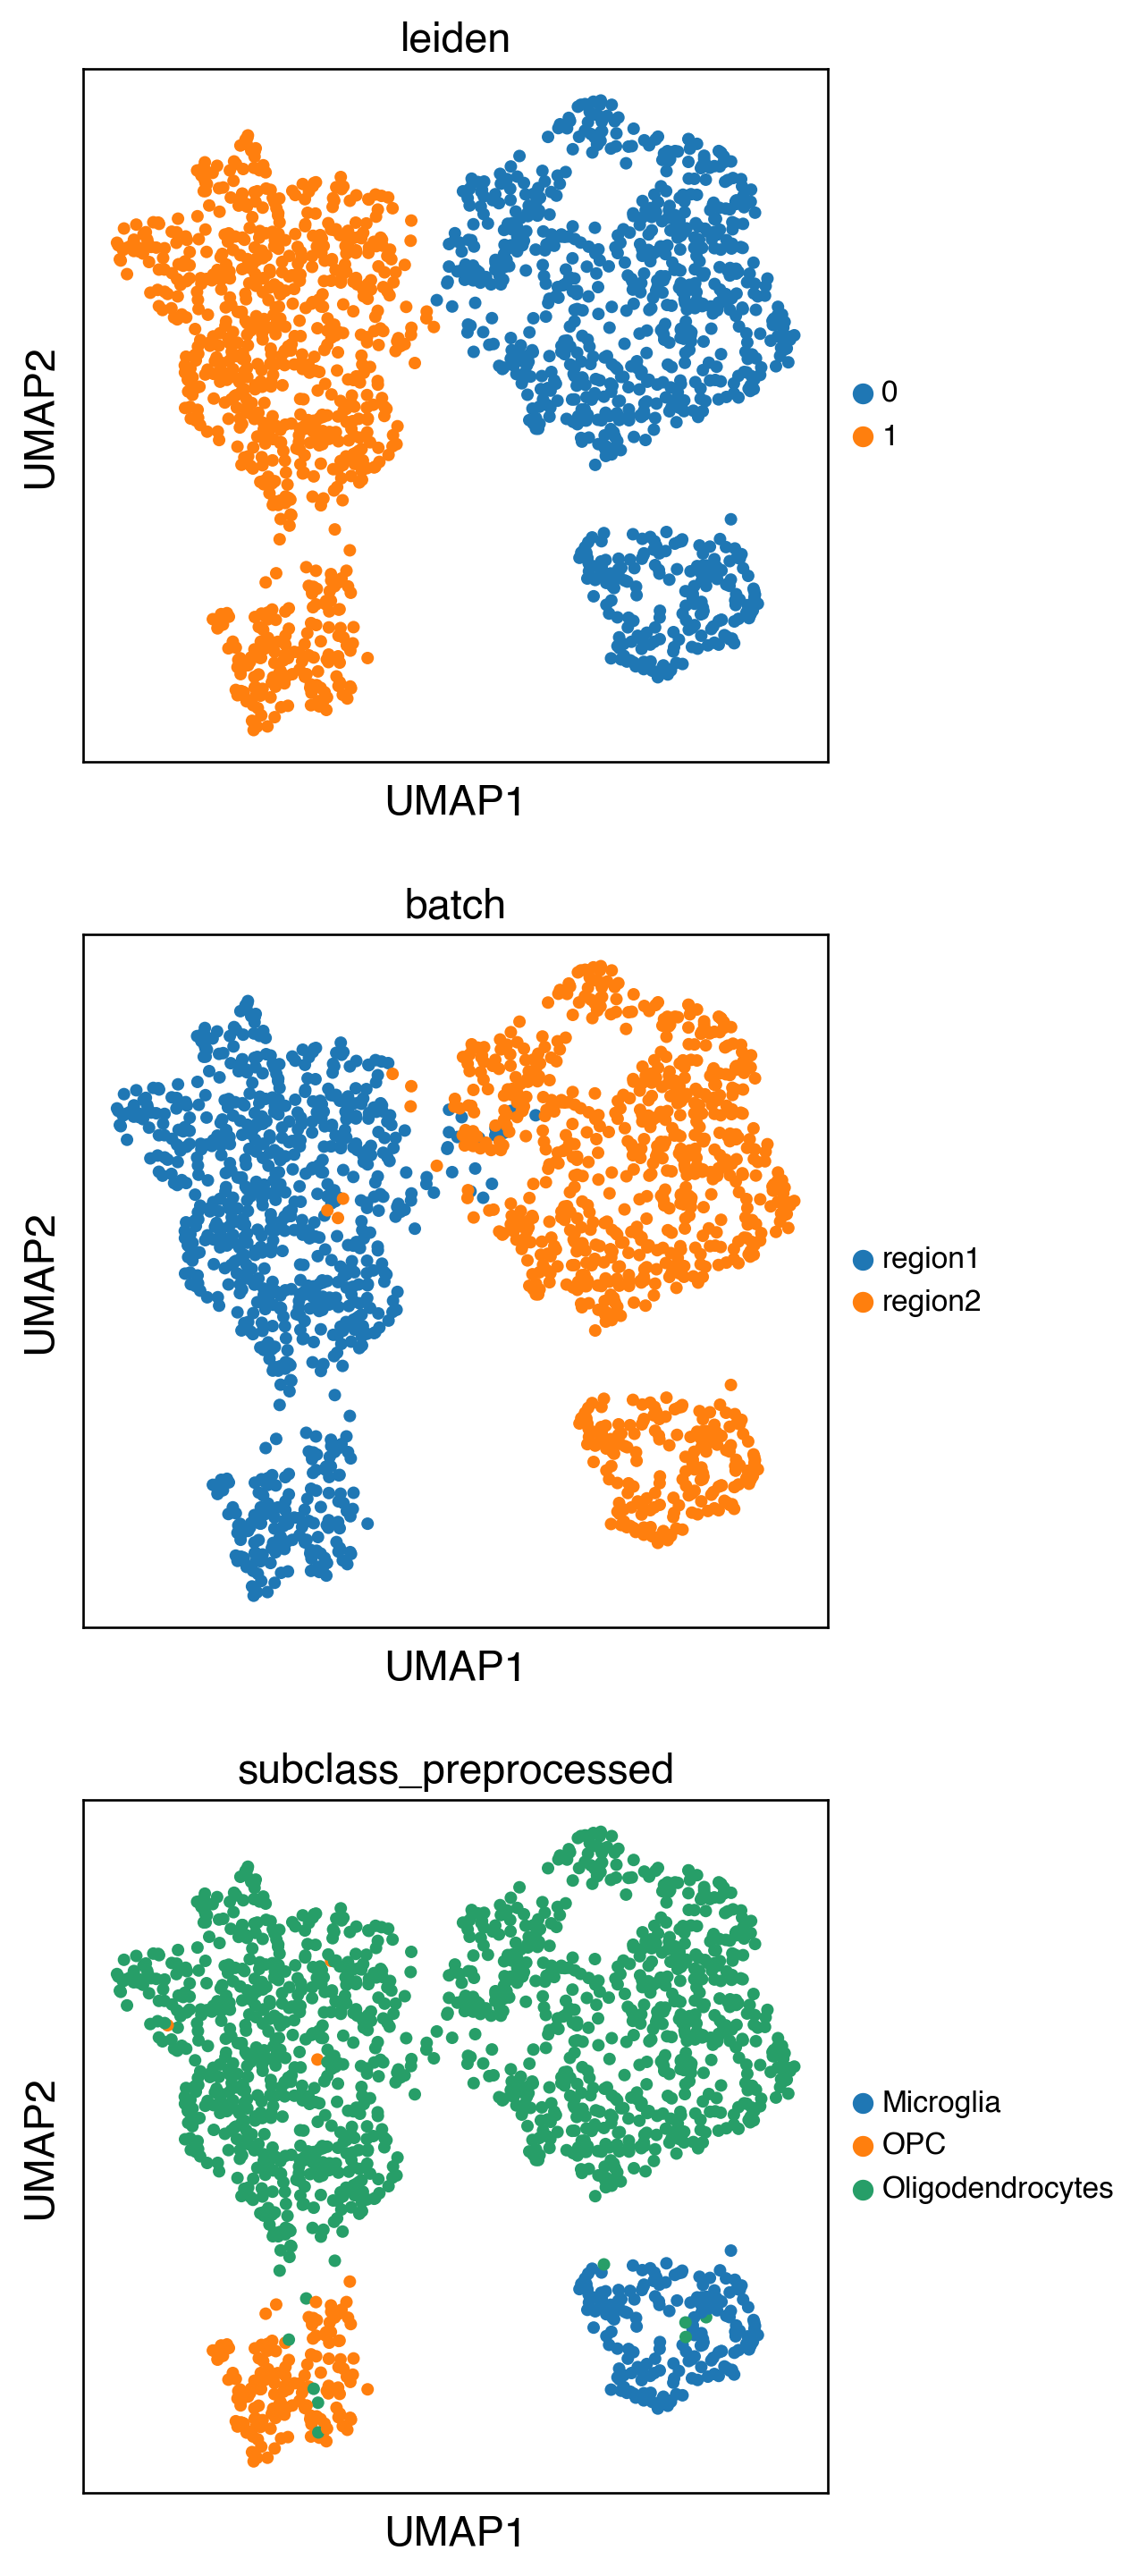

In [10]:
sc.set_figure_params(dpi=120,facecolor='w',frameon=True,figsize=(4,4.5)) 
sc.pl.umap(adata,color=['leiden','batch','subclass_preprocessed'],ncols=1,legend_fontsize=10)

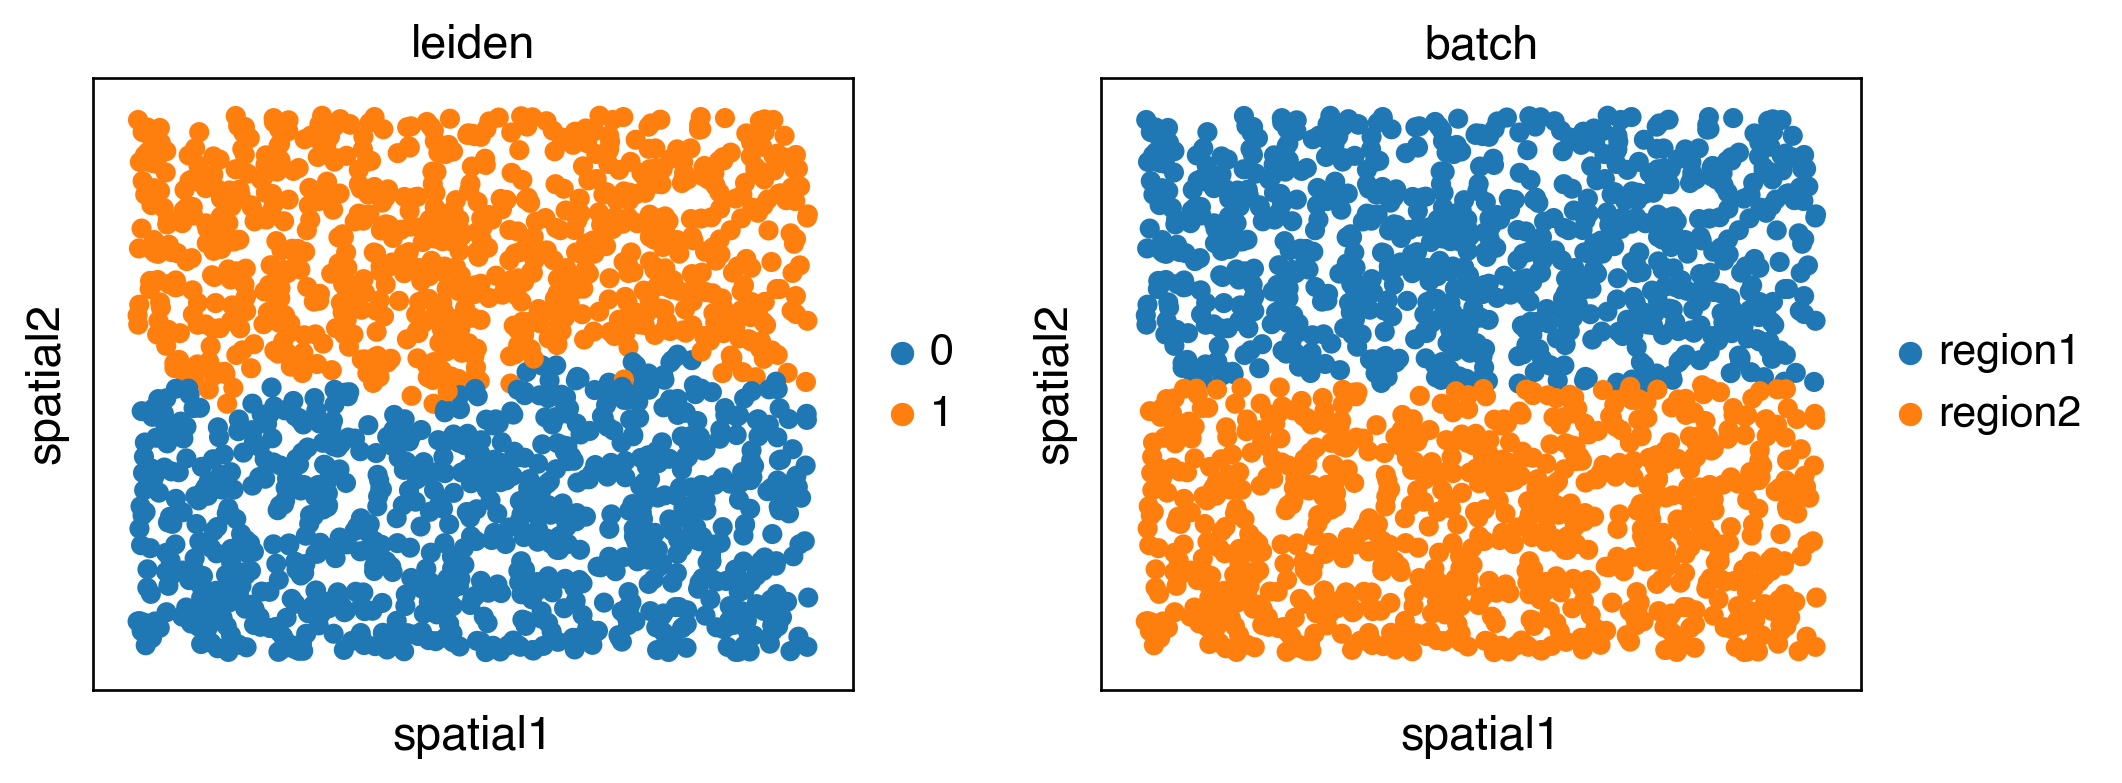

In [11]:
sc.pl.spatial(adata,color=['leiden','batch'],spot_size=3)

In [12]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI

In [13]:
ARI(adata.obs['batch'].values, adata.obs['leiden'].values)

0.9395485809882733

In [14]:
from sklearn.metrics import homogeneity_score

In [15]:
homogeneity_score(adata.obs['batch'].values, adata.obs['leiden'].values)

0.8891429145185604

In [16]:
adata.write('sim/adata_results.h5ad')